In [1]:
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import plot_confusion_matrix


plt.style.use('fivethirtyeight')
#plt.style.use('default')


import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 250)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 30)

In [3]:
df = pd.read_csv('hr-data.csv')

In [4]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
df.shape

(14999, 11)

In [6]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
#check unique values for each variable
df_cols = list(df.columns)
for num in df_cols:
    print(f'{num}: {df[num].nunique()}')

id: 14999
satisfaction_level: 92
last_evaluation: 65
number_project: 6
average_montly_hours: 215
time_spend_company: 8
Work_accident: 2
churn: 2
promotion_last_5years: 2
sales: 10
salary: 3


In [9]:
df.info()

#There are no empty rows; check object type columns
#HR Dept has all their personal and employment data on file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   churn                  14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   sales                  14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [10]:
print(df[df['sales']==''].count())
print('\n')
print(df[df['salary']==''].count())

#There are no empty strings

id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(14999, 11)

In [13]:
df.describe()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


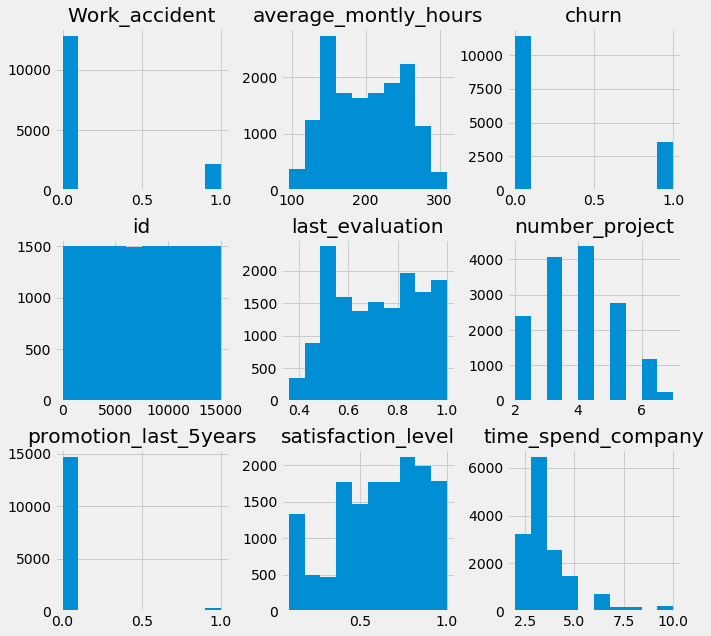

In [14]:
df.hist(figsize=(10,10));

In [15]:
#id is likely to be a unique identifier for all employees
#not many promotions in the last 5 years
#slight left skew is satisfaction level
#heavy right skew in time_spend_company

In [16]:
df.shape

(14999, 11)

In [17]:
#Lets understand what a row represents
df.groupby(['salary','sales','number_project','time_spend_company','satisfaction_level','average_montly_hours','last_evaluation','Work_accident','churn','promotion_last_5years']).count().shape

#for this case going to use id to represent a row 
#grouped by every variable and the most is 11991
# this means there are multiple employees in this company which share similar HR information

(11991, 1)

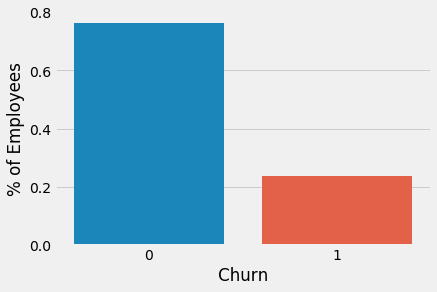

In [18]:
#df['churn'].value_counts(normalize=True)
df_churn = df['churn'].value_counts(normalize=True).to_frame().reset_index()
df_churn.columns=['Churn', '% of Employees']
g = sns.barplot(x='Churn',y='% of Employees', data = df_churn)
#for index, row in df_churn.iterrows():
#    g.text(row.name,row['Churn'], round(row['% of Employees'],2), color='black', ha="center")

#We see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 76% 
#and the percentage of Ex-employees is: 24%.
#Machine learning algorithms typically work best when the number of instances of each classes are roughly equal.
#We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.


Average satisfaction level for non-churners: 0.67
Average satisfaction level for churners: 0.44


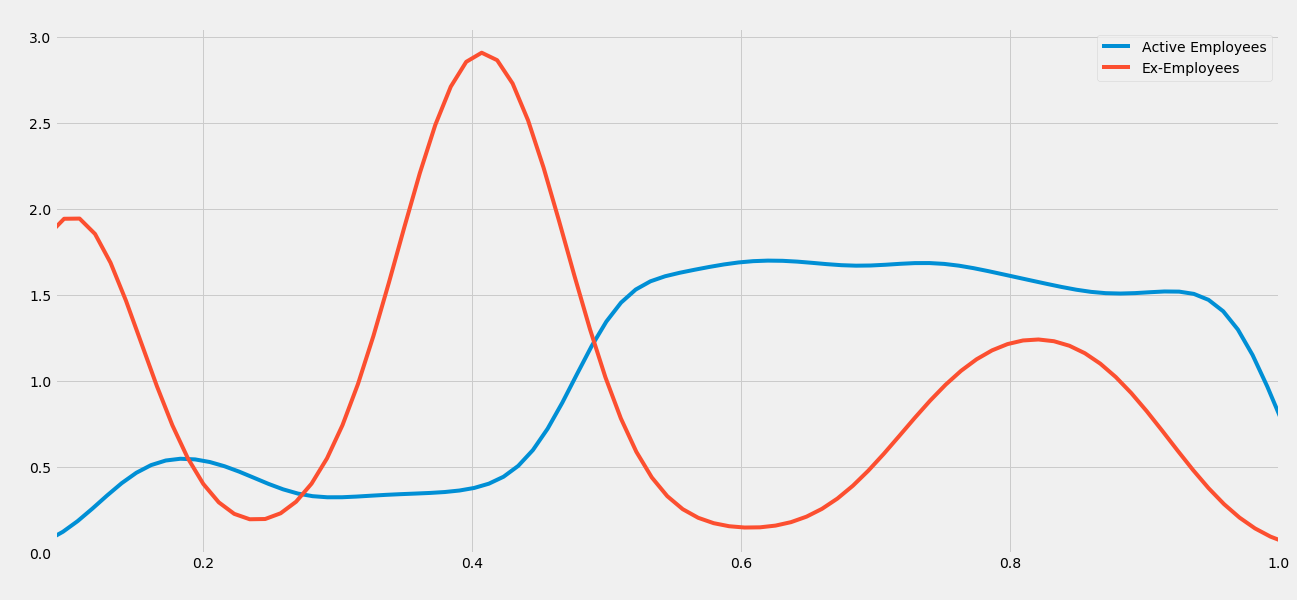

In [19]:
print('Average satisfaction level for non-churners: {:.2f}'.format(df[df['churn']==0]['satisfaction_level'].mean()))
print('Average satisfaction level for churners: {:.2f}'.format(df[df['churn']==1]['satisfaction_level'].mean()))
fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

#sns.set(font_scale = 4)
sns.kdeplot(df.loc[df['churn']==0, 'satisfaction_level'],label='Active Employees')
sns.kdeplot(df.loc[df['churn']==1, 'satisfaction_level'],label='Ex-Employees')
plt.xlim(left=df['satisfaction_level'].min(), right=df['satisfaction_level'].max())
plt.xlabel(' ')
plt.ylabel(' ')
plt.title(' ');

#Non-churners have higher satisfaction levels
#Churners peak at 0.09,0.4,0.8 
#fig.savefig('kde_satisfaction_level', transparent=True)

Average average_montly_hours for non-churners: 199.06
Average average_montly_hours for churners: 207.42


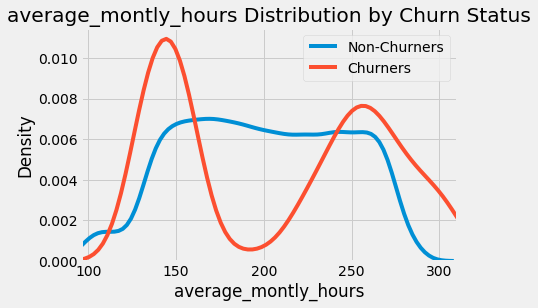

In [20]:
print('Average average_montly_hours for non-churners: {:.2f}'.format(df[df['churn']==0]['average_montly_hours'].mean()))
print('Average average_montly_hours for churners: {:.2f}'.format(df[df['churn']==1]['average_montly_hours'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'average_montly_hours'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'average_montly_hours'],label='Churners')
plt.xlim(left=df['average_montly_hours'].min(), right=df['average_montly_hours'].max())
plt.xlabel('average_montly_hours')
plt.ylabel('Density')
plt.title('average_montly_hours Distribution by Churn Status');


Average last evaluation for non-churners: 0.72
Average last evaluation for churners: 0.72


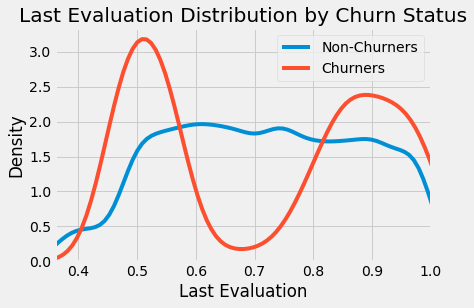

In [21]:
print('Average last evaluation for non-churners: {:.2f}'.format(df[df['churn']==0]['last_evaluation'].mean()))
print('Average last evaluation for churners: {:.2f}'.format(df[df['churn']==1]['last_evaluation'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'last_evaluation'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'last_evaluation'],label='Churners')
plt.xlim(left=df['last_evaluation'].min(), right=df['last_evaluation'].max())
plt.xlabel('Last Evaluation')
plt.ylabel('Density')
plt.title('Last Evaluation Distribution by Churn Status');

Average number_project for non-churners: 3.79
Average number_project for churners: 3.86


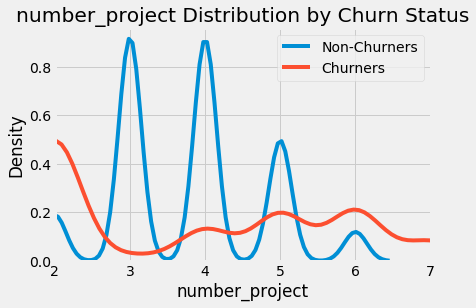

In [22]:
print('Average number_project for non-churners: {:.2f}'.format(df[df['churn']==0]['number_project'].mean()))
print('Average number_project for churners: {:.2f}'.format(df[df['churn']==1]['number_project'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'number_project'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'number_project'],label='Churners')
plt.xlim(left=df['number_project'].min(), right=df['number_project'].max())
plt.xlabel('number_project')
plt.ylabel('Density')
plt.title('number_project Distribution by Churn Status');

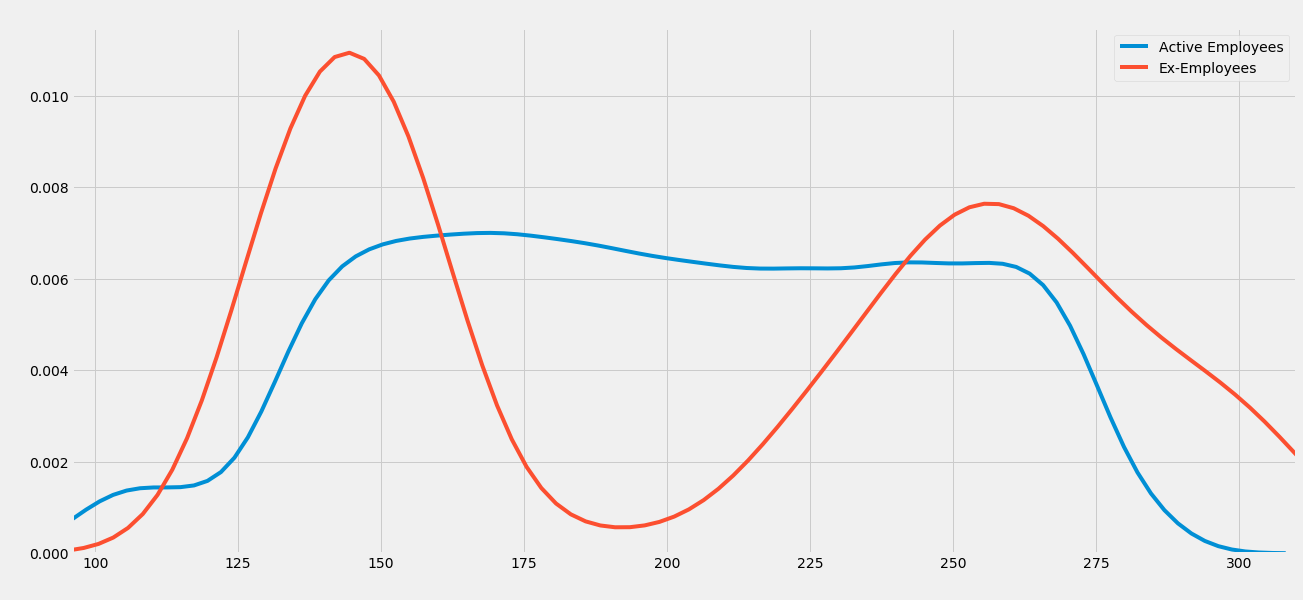

In [23]:
fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

#sns.set(font_scale = 4)
sns.kdeplot(df.loc[df['churn']==0, 'average_montly_hours'],label='Active Employees')
sns.kdeplot(df.loc[df['churn']==1, 'average_montly_hours'],label='Ex-Employees')
plt.xlim(left=df['average_montly_hours'].min(), right=df['average_montly_hours'].max())

#axes.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))

plt.xlabel(' ')
plt.ylabel(' ')
plt.title(' ');


#Non-churners have higher satisfaction levels
#Churners peak at 0.09,0.4,0.8 
# fig.savefig('kde_average_hours', transparent=True)

Average time_spend_company for non-churners: 3.38
Average time_spend_company for churners: 3.88


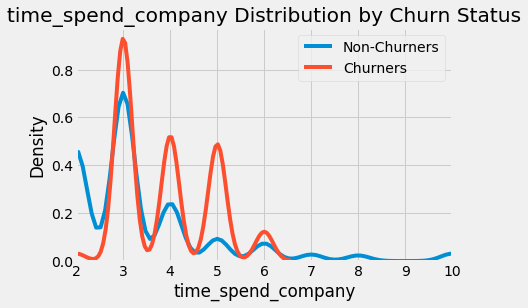

In [24]:
print('Average time_spend_company for non-churners: {:.2f}'.format(df[df['churn']==0]['time_spend_company'].mean()))
print('Average time_spend_company for churners: {:.2f}'.format(df[df['churn']==1]['time_spend_company'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'time_spend_company'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'time_spend_company'],label='Churners')
plt.xlim(left=df['time_spend_company'].min(), right=df['time_spend_company'].max())
plt.xlabel('time_spend_company')
plt.ylabel('Density')
plt.title('time_spend_company Distribution by Churn Status');


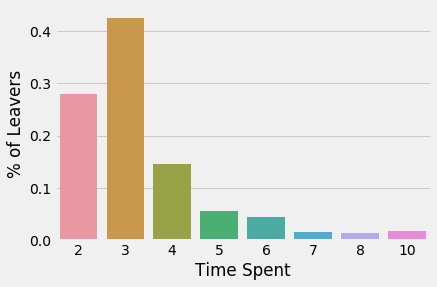

In [25]:
df_time_comp = df[df['churn']==0]['time_spend_company'].value_counts(normalize=True).to_frame().reset_index()
df_time_comp.columns=['Time Spent', '% of Leavers']
sns.barplot(x='Time Spent',y='% of Leavers', data = df_time_comp)


In [26]:
df.groupby('time_spend_company')['id'].count()

time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: id, dtype: int64

Text(0, 0.5, ' ')

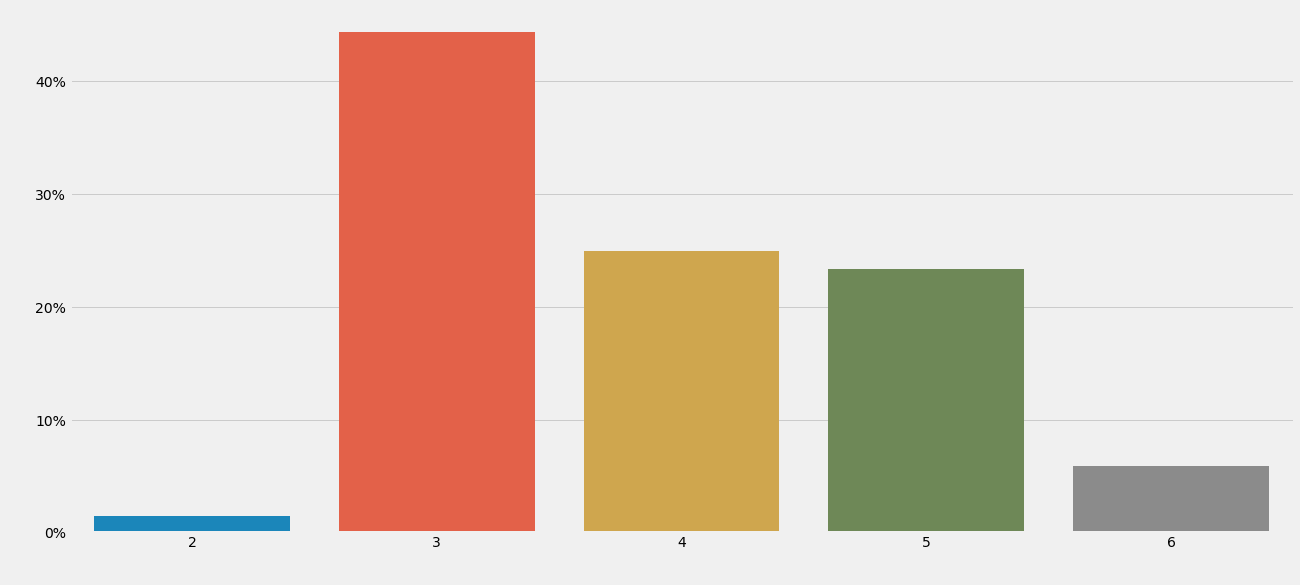

In [27]:
import matplotlib.ticker as mtick

df_time_comp = df[df['churn']==1]['time_spend_company'].value_counts(normalize=True).to_frame().reset_index()
df_time_comp.columns=['Time Spent', '% of Leavers']

fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

#sns.set(font_scale = 4)

sns.barplot(x='Time Spent',y='% of Leavers', data = df_time_comp)

axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))


#The plot below indicates a negative correlation with the salary type of an employee and the Attrition Status. 
#In other words, employees with higher salary are less likely to leave.
plt.xlabel(' ', fontsize=24)
plt.ylabel(' ', fontsize=24)

# fig.savefig('leavers_time_spent', transparent=True)

In [28]:
print(df['Work_accident'].value_counts(normalize=True))
print(df[df['churn']==0]['Work_accident'].value_counts(normalize=True))
print(df[df['churn']==1]['Work_accident'].value_counts(normalize=True))

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64
0    0.824991
1    0.175009
Name: Work_accident, dtype: float64
0    0.952674
1    0.047326
Name: Work_accident, dtype: float64


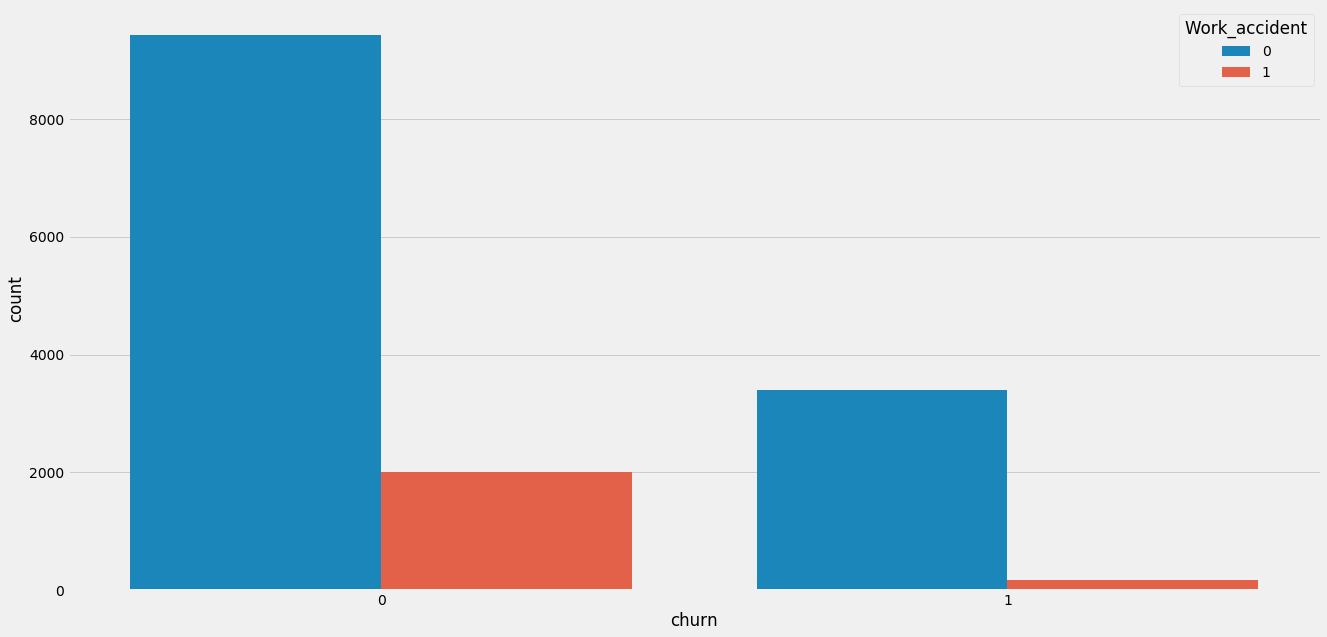

In [29]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.countplot(x = 'churn', hue = 'Work_accident',data=df)

In [30]:
print(df['churn'].value_counts(normalize=True))
#class imbalance! have to scale

0    0.761917
1    0.238083
Name: churn, dtype: float64


In [31]:
print(df['promotion_last_5years'].value_counts(normalize=True))
print(df[df['churn']==0]['promotion_last_5years'].value_counts(normalize=True))
print(df[df['churn']==1]['promotion_last_5years'].value_counts(normalize=True))

#people who churned had little to no promotions 

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64
0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64
0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64


In [32]:
df.groupby('time_spend_company')['promotion_last_5years'].sum()

time_spend_company
2      54
3     134
4      35
5      17
6      17
7      36
8      10
10     16
Name: promotion_last_5years, dtype: int64

In [33]:
print(df['sales'].value_counts(normalize=True))
print(df[df['churn']==0]['sales'].value_counts(normalize=True))
print(df[df['churn']==1]['sales'].value_counts(normalize=True))

#similar roles throughout

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64
sales          0.273539
technical      0.177021
support        0.146482
IT             0.083479
product_mng    0.061603
RandD          0.058278
marketing      0.057315
accounting     0.049265
management     0.047165
hr             0.045852
Name: sales, dtype: float64
sales          0.283954
technical      0.195183
support        0.155419
IT             0.076449
hr             0.060207
accounting     0.057127
marketing      0.056847
product_mng    0.055447
RandD          0.033884
management     0.025483
Name: sales, dtype: float64


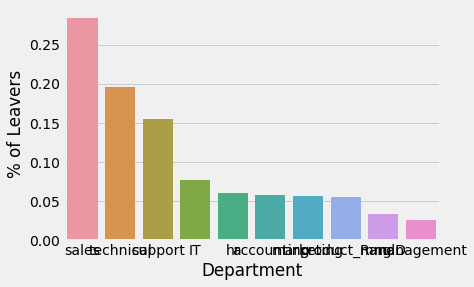

In [34]:
df_DeptField = df[df['churn']==1]['sales'].value_counts(normalize=True).to_frame().reset_index()
df_DeptField.columns=['Department', '% of Leavers']
sns.barplot(x='Department',y='% of Leavers', data = df_DeptField)

#remove x-axis labels and make a legend 

In [35]:
print(df['salary'].value_counts(normalize=False))
print(df[df['churn']==0]['salary'].value_counts(normalize=True))
print(df[df['churn']==1]['salary'].value_counts(normalize=True))

#more lower salaries for people who churned

low       7316
medium    6446
high      1237
Name: salary, dtype: int64
low       0.450123
medium    0.448810
high      0.101068
Name: salary, dtype: float64
low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64


In [36]:
df.groupby('churn')['id'].count()


churn
0    11428
1     3571
Name: id, dtype: int64

Text(0, 0.5, ' ')

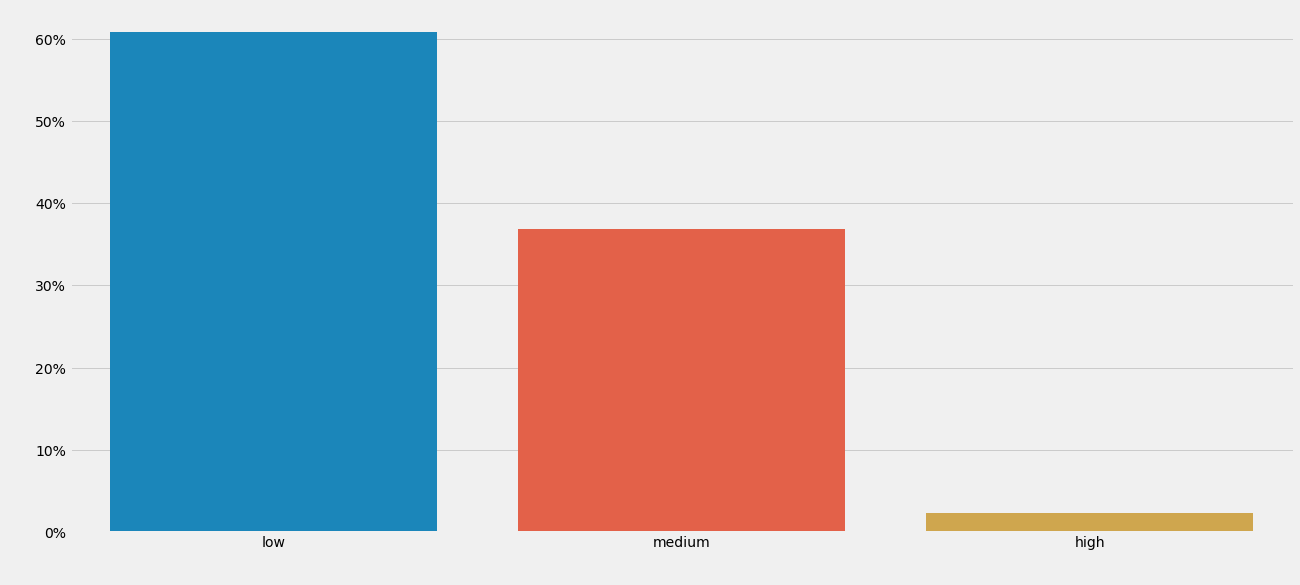

In [37]:
fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

df_sal = df[df['churn']==1]['salary'].value_counts(normalize=True).to_frame().reset_index()
df_sal.columns=['Salary', '% of Leavers']

sns.barplot(x='Salary',y='% of Leavers', data = df_sal)
axes.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


#The plot below indicates a negative correlation with the salary type of an employee and the Attrition Status. 
#In other words, employees with higher salary are less likely to leave.
plt.xlabel(' ', fontsize=24)
plt.ylabel(' ', fontsize=24)

# fig.savefig('leavers_salary', transparent=True)

In [38]:
# Find correlations with the target and sort
df_copy = df.copy()
df_copy['Target'] = df['churn']
df_copy = df_copy.drop(['id','churn'],axis=1)
correlations = df_copy.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

#worth remembering that correlation coefficients only measure linear correlations

Most Positive Correlations: 
 last_evaluation         0.006567
number_project          0.023787
average_montly_hours    0.071287
time_spend_company      0.144822
Target                  1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
Name: Target, dtype: float64


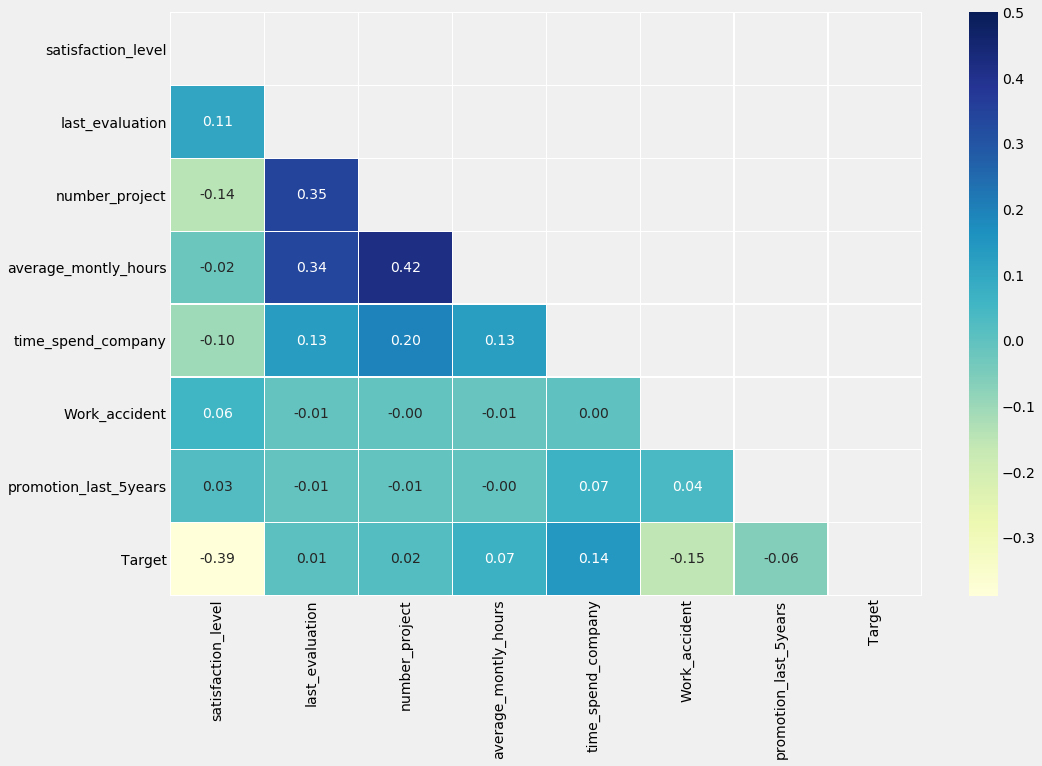

In [39]:
# Calculate correlations
corr = df_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

#Satisfaction level, work accident, promotion are negatively correlated
#Average monthly hours, time spent at company are positively correlated 

<Figure size 432x288 with 0 Axes>

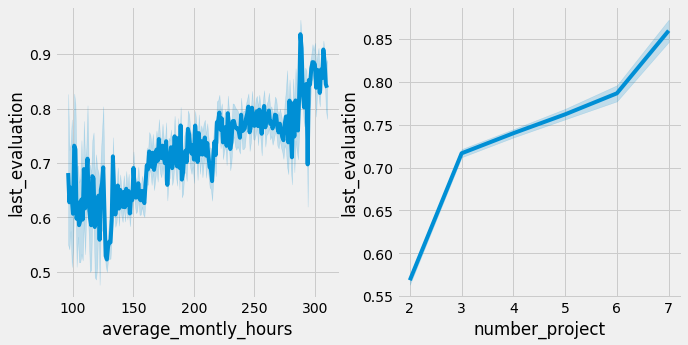

In [40]:
plt.tight_layout()
fig, axes = plt.subplots(1,2,figsize=(10, 5))
sns.lineplot(x='average_montly_hours',y= 'last_evaluation',data=df,ax=axes[0]) 
sns.lineplot(x='number_project',y= 'last_evaluation', data=df,ax=axes[1]) 

EDA Summary
- The dataset does not feature any missing or erroneous data values, and all features are of the correct data type
- The strongest positive correlations with the target features are: number_project, average_montly_hours, time_spend_company 
- The strongest negative correlations with the target features are: satisfaction_level, Work_accident, promotion_last_5years
- The dataset is imbalanced with the majoriy of observations describing non-churners (76%) vs churners (24%)
- Features (ie columns)redundant for our analysis: id

Other observations:
- Churners have lower satisfaction levels
- Churners have more projects
- People who churned had little to no promotions 
- Majority of churners are in the sales dept.
- Majority of churners have a low salary

In [41]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


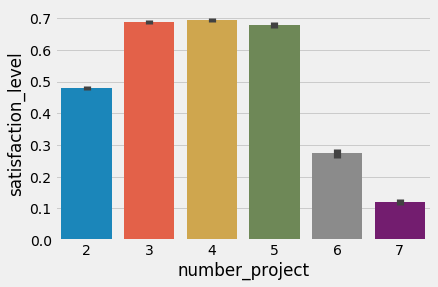

In [48]:
sns.barplot(x='number_project',y='satisfaction_level',data=df)

In [49]:
df.groupby('number_project')['satisfaction_level'].mean()

number_project
2    0.478769
3    0.687670
4    0.695132
5    0.678888
6    0.273458
7    0.118711
Name: satisfaction_level, dtype: float64

## More discovery!

In [3]:
df2 = pd.read_csv('df_for_preprocessing.csv')

In [4]:
df2.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,very high performance,high hr,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high hr,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,very high performance,med hr,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [6]:
df2.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'dept', 'salary', 'sat_level_cluster',
       'last_eval_cluster', 'avg_month_hr_cluster',
       'satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xnumber_project^1',
       'satisfaction_level^1xaverage_montly_hours^1',
       'satisfaction_level^1xtime_spend_company^1',
       'last_evaluation^1xnumber_project^1',
       'last_evaluation^1xaverage_montly_hours^1',
       'last_evaluation^1xtime_spend_company^1',
       'number_project^1xaverage_montly_hours^1',
       'number_project^1xtime_spend_company^1',
       'average_montly_hours^1xtime_spend_company^1'],
      dtype='object')

In [97]:
df2.groupby('sat_level_cluster')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
sat_level_cluster,,,,,,,,
satisfied,4633.0,0.679361,0.064709,0.57,0.62,0.68,0.74,0.78
unsatisfied,3984.0,0.452093,0.067452,0.31,0.40,0.45,0.51,0.56
very satisfied,4441.0,0.887651,0.061710,0.79,0.83,0.89,0.94,1.00
very unsatisfied,1941.0,0.155183,0.061473,0.09,0.10,0.13,0.20,0.30


In [28]:
df2.groupby('sat_level_cluster')['churn'].mean()

sat_level_cluster
satisfied           0.080078
unsatisfied         0.409388
very satisfied      0.140059
very unsatisfied    0.487893
Name: churn, dtype: float64

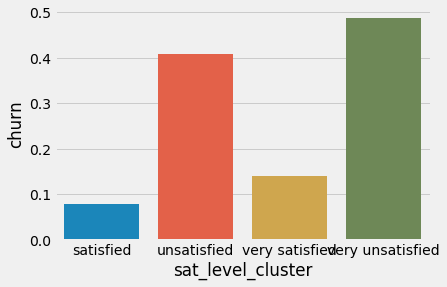

In [23]:
sns.barplot(x='sat_level_cluster',y='churn', data = df2.groupby('sat_level_cluster')['churn'].mean().reset_index())    

In [31]:
df2.groupby('last_eval_cluster')['last_evaluation'].describe()

,count,mean,std,min,25%,50%,75%,max
last_eval_cluster,,,,,,,,
average performance,3131.0,0.643098,0.039939,0.58,0.61,0.64,0.68,0.71
high performance,3488.0,0.788449,0.040866,0.72,0.75,0.79,0.83,0.85
low performance,4262.0,0.505106,0.048529,0.36,0.48,0.51,0.54,0.57
very high performance,4118.0,0.928703,0.043407,0.86,0.89,0.93,0.97,1.00


In [98]:
df2['last_evaluation'].mean()

0.7161017401160078

In [32]:
df2.groupby('last_eval_cluster')['churn'].mean()

last_eval_cluster
average performance      0.026828
high performance         0.167431
low performance          0.374003
very high performance    0.317873
Name: churn, dtype: float64

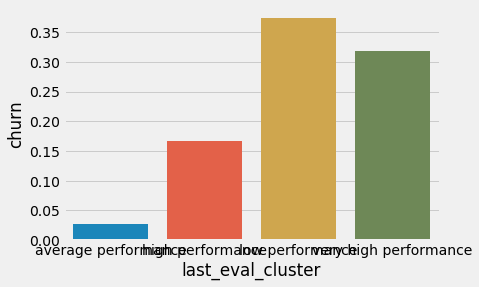

In [33]:
sns.barplot(x='last_eval_cluster',y='churn', data = df2.groupby('last_eval_cluster')['churn'].mean().reset_index())    

In [67]:
df2.groupby('avg_month_hr_cluster')['average_montly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
avg_month_hr_cluster,,,,,,,,
high hr,5104.0,258.326607,17.709606,231.0,244.0,257.0,269.0,310.0
low hr,5500.0,146.582364,16.793536,96.0,136.0,148.0,159.0,174.0
med hr,4395.0,202.696701,16.424076,175.0,188.0,203.0,217.0,230.0


In [69]:
df2['average_montly_hours'].mean()

201.0503366891126

In [68]:
df2.groupby('avg_month_hr_cluster')['churn'].mean()

avg_month_hr_cluster
high hr    0.331701
low hr     0.293091
med hr     0.060523
Name: churn, dtype: float64

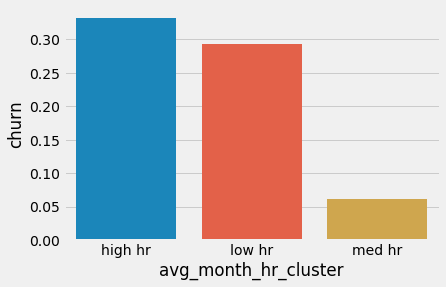

In [61]:
sns.barplot(x='avg_month_hr_cluster',y='churn', data = df2.groupby('avg_month_hr_cluster')['churn'].mean().reset_index())    

In [44]:
# Looking at only very high performers from their last evaluation
df2_very_high_perf = df2[df2['last_eval_cluster'] == 'very high performance']

In [81]:
df2_very_high_perf.groupby('avg_month_hr_cluster')['churn'].mean()

avg_month_hr_cluster
high hr    0.550150
low hr     0.031320
med hr     0.149593
Name: churn, dtype: float64

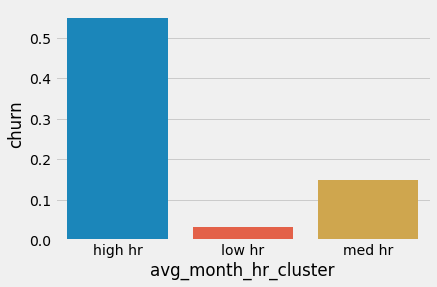

In [77]:
sns.barplot(x='avg_month_hr_cluster',y='churn', data = df2_very_high_perf.groupby('avg_month_hr_cluster')['churn'].mean().reset_index())    

In [78]:
df2_very_high_perf.groupby('avg_month_hr_cluster').count()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
avg_month_hr_cluster,,,,,,,,,,,,,,,,,,,,,,,
high hr,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994
low hr,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894
med hr,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230


In [100]:
df2_very_high_perf.groupby('sat_level_cluster')['churn'].mean()

sat_level_cluster
satisfied           0.204545
unsatisfied         0.056641
very satisfied      0.325737
very unsatisfied    0.686667
Name: churn, dtype: float64

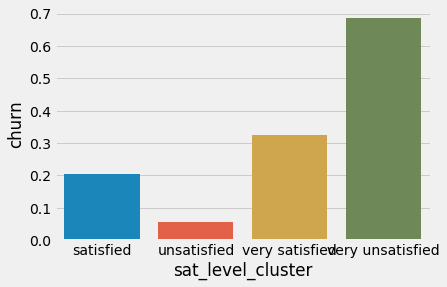

In [76]:
sns.barplot(x='sat_level_cluster',y='churn', data = df2_very_high_perf.groupby('sat_level_cluster')['churn'].mean().reset_index())    

In [73]:
df2_very_high_perf.groupby('sat_level_cluster').count()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
sat_level_cluster,,,,,,,,,,,,,,,,,,,,,,,
satisfied,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
unsatisfied,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
very satisfied,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492
very unsatisfied,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750


In [102]:
df2_test = df2[(df2['avg_month_hr_cluster'] == 'low hr') & (df2['last_eval_cluster'] == 'low performance')]

In [103]:
df2_test.shape

(2571, 24)

In [106]:
df2_test.groupby('sat_level_cluster')['churn'].count()

sat_level_cluster
satisfied            363
unsatisfied         1867
very satisfied       238
very unsatisfied     103
Name: churn, dtype: int64

In [82]:
# Looking at only employees who have low working time
df2_low_hr = df2[df2['avg_month_hr_cluster'] == 'low hr']

In [88]:
df2_low_hr.shape

(5500, 24)

In [84]:
df2_low_hr.groupby('last_eval_cluster')['churn'].mean()

last_eval_cluster
average performance      0.018868
high performance         0.032538
low performance          0.596266
very high performance    0.031320
Name: churn, dtype: float64

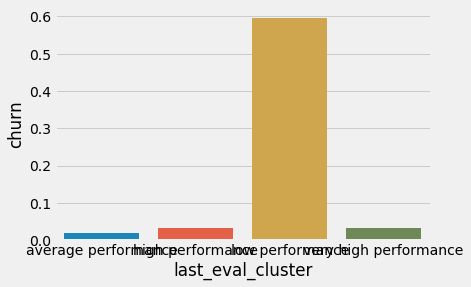

In [86]:
sns.barplot(x='last_eval_cluster',y='churn', data = df2_low_hr.groupby('last_eval_cluster')['churn'].mean().reset_index())    

In [90]:
df2_low_hr.groupby('last_eval_cluster').count()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
last_eval_cluster,,,,,,,,,,,,,,,,,,,,,,,
average performance,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
high performance,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922
low performance,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571
very high performance,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894


In [91]:
df2_low_hr.groupby('sat_level_cluster')['churn'].mean()

sat_level_cluster
satisfied           0.017943
unsatisfied         0.623949
very satisfied      0.010753
very unsatisfied    0.043478
Name: churn, dtype: float64

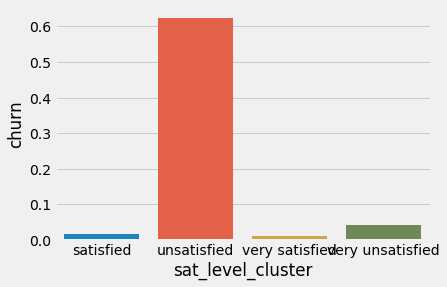

In [92]:
sns.barplot(x='sat_level_cluster',y='churn', data = df2_low_hr.groupby('sat_level_cluster')['churn'].mean().reset_index())    

In [94]:
df2_low_hr.groupby('sat_level_cluster').count()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
sat_level_cluster,,,,,,,,,,,,,,,,,,,,,,,
satisfied,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
unsatisfied,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497
very satisfied,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
very unsatisfied,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
